In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('final.txt')
df['pdb_id'] = df['pair'].apply(lambda x: x.split('_')[0])
df = df.rename(columns={'pdockq1': 'pdockq2', 'pdockq2': 'pdockq1'})

## violin plot

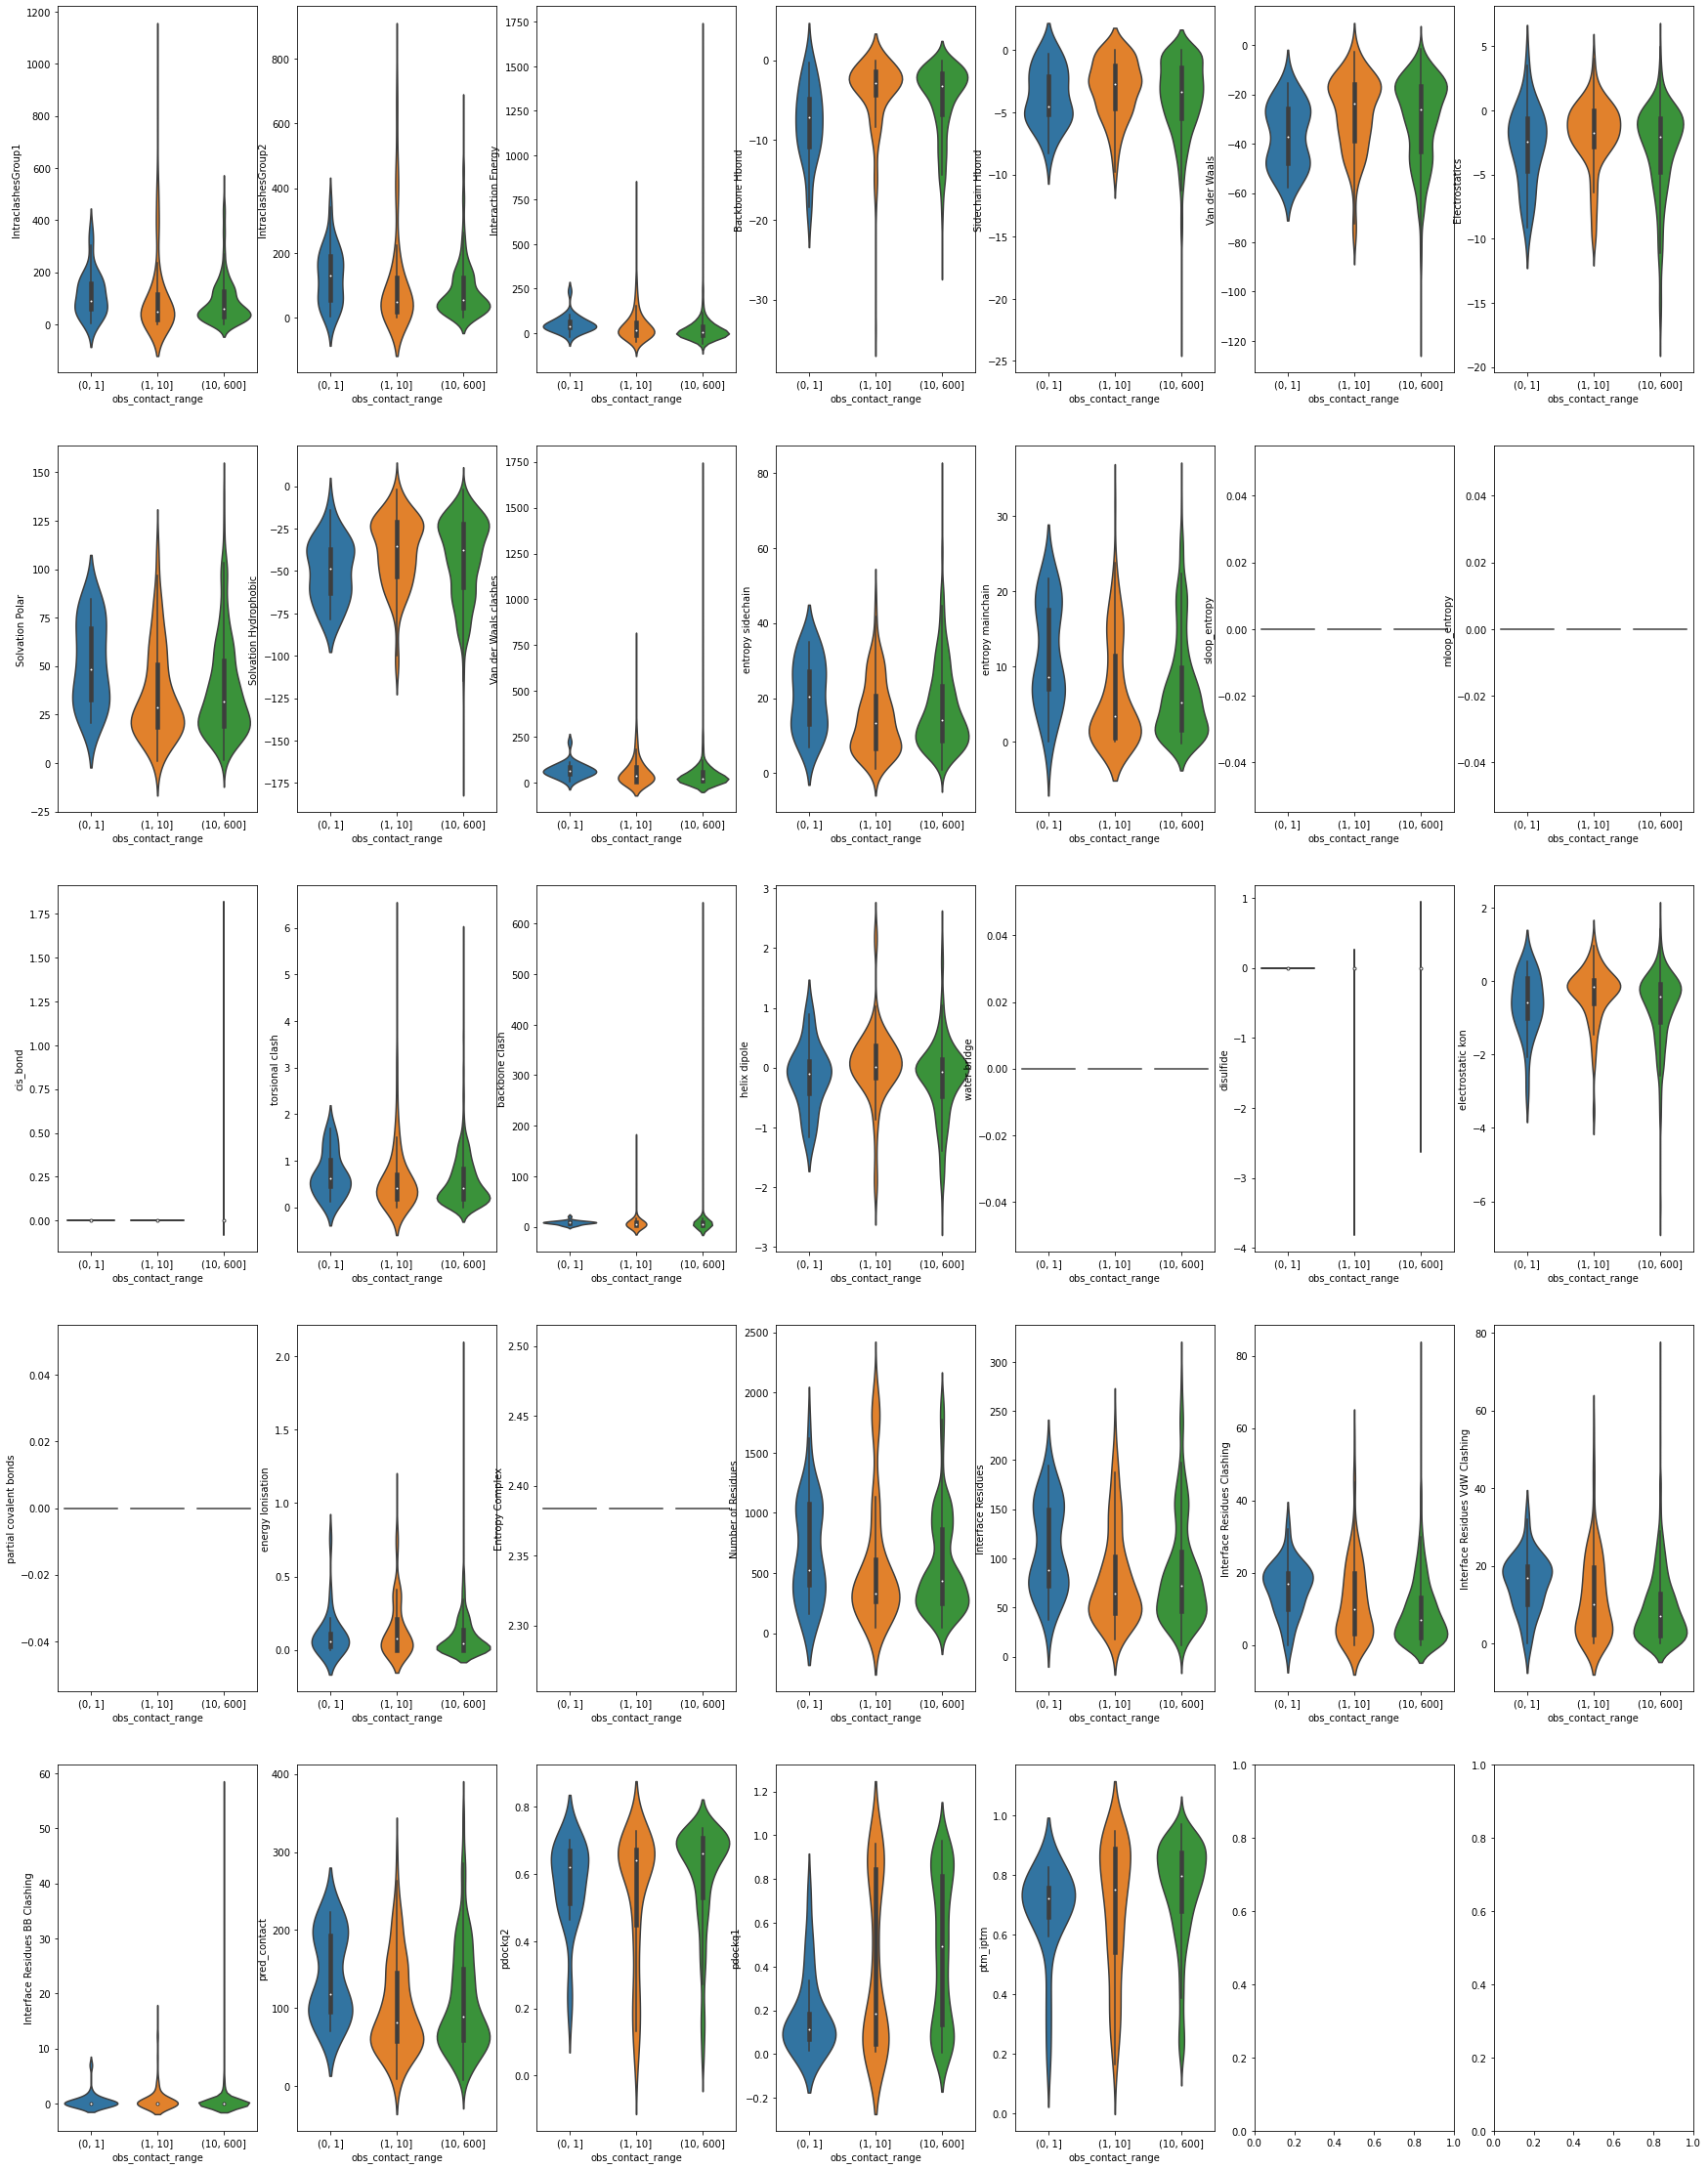

In [61]:
f,axs=plt.subplots(5,7,figsize=(40,40))
df['obs_contact_range'] = pd.cut(df['obs_contact'], [0, 1, 10, 600])
for i,feature in enumerate(df.drop(['pair', 'pdb_id', 'obs_contact','obs_contact_range'], axis=1).columns):
    row = i // 7
    col = i % 7
    ax = axs[row, col]
    sns.violinplot(x='obs_contact_range', y=feature, data=df, ax=ax)

We can see that some features are useless. Also utilizing domain knowledge we can ignore some other features

In [62]:
df= df.drop(['Entropy Complex', 'sloop_entropy', 'mloop_entropy', 'cis_bond', 'water bridge', 'disulfide', 'partial covalent bonds', 'Entropy Complex', 'backbone clash'],axis=1)
len(df.columns)

29

## Scatter Plot

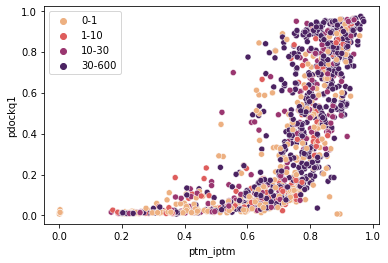

In [10]:
ranges = [(0, 1), (1, 10), (10, 30), (30, 600)]

# Generate a colormap index for each observation in dfp.obs_contact
obs_contact_colors = np.zeros_like(df.obs_contact, dtype=int)
for i, (start, end) in enumerate(ranges):
    obs_contact_colors[(start <= df.obs_contact) & (df.obs_contact < end)] = i

# Create a dictionary to map colormap indices to value ranges
legend_labels = {i: f'{start}-{end}' for i, (start, end) in enumerate(ranges)}

# Plot the scatterplot with custom colors and legend labels
sns.scatterplot(x=df['ptm_iptm'], y=df['pdockq1'], hue=obs_contact_colors, palette='flare')

# Customize the legend labels
handles, _ = plt.gca().get_legend_handles_labels()
labels = [legend_labels[int(label)] for label in _]
plt.legend(handles, labels)

# Show the plot
plt.show()

In [54]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

binary_obs= np.where(df['obs_contact'] > 10, 1, 0)
binary_pdockq1= np.where(df['pdockq1'] > 0.13, 1, 0)
binary_pdockq2= np.where(df['pdockq2'] > 0.679, 1, 0)

In [55]:
CM = confusion_matrix(binary_obs,binary_pdockq2)
FP_count = CM[0,1]
TP_count = CM[1,1]
FN_count = CM[1,0]
TN_count = CM[0,0]
print (FP_count,'= False Positives')
print (FN_count,'= False Negatives')
print (TP_count,'= True Positives')
print (TN_count ,'= True Negatives')

print(round(matthews_corrcoef(binary_obs,binary_pdockq2),3),'= MCC_score')
print(classification_report(binary_obs,binary_pdockq2))

86 = False Positives
470 = False Negatives
327 = True Positives
487 = True Negatives
0.28 = MCC_score
              precision    recall  f1-score   support

           0       0.51      0.85      0.64       573
           1       0.79      0.41      0.54       797

    accuracy                           0.59      1370
   macro avg       0.65      0.63      0.59      1370
weighted avg       0.67      0.59      0.58      1370



In [56]:
CM = confusion_matrix(binary_obs,binary_pdockq1)
FP_count = CM[0,1]
TP_count = CM[1,1]
FN_count = CM[1,0]
TN_count = CM[0,0]
print (FP_count,'= False Positives')
print (FN_count,'= False Negatives')
print (TP_count,'= True Positives')
print (TN_count ,'= True Negatives')

print(round(matthews_corrcoef(binary_obs,binary_pdockq1),2),'= MCC_score')
print(classification_report(binary_obs,binary_pdockq1))

249 = False Positives
194 = False Negatives
603 = True Positives
324 = True Negatives
0.33 = MCC_score
              precision    recall  f1-score   support

           0       0.63      0.57      0.59       573
           1       0.71      0.76      0.73       797

    accuracy                           0.68      1370
   macro avg       0.67      0.66      0.66      1370
weighted avg       0.67      0.68      0.67      1370



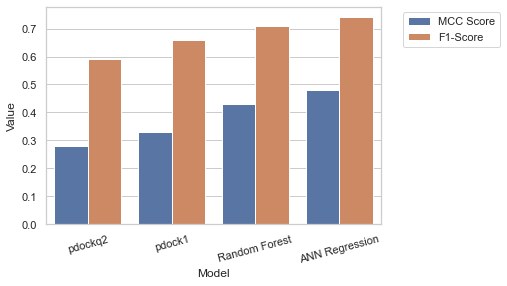

In [70]:
data = {
    'Model': ['pdockq2', 'pdock1', 'Random Forest', 'ANN Regression'],
    'MCC Score': [0.28, 0.33, 0.43, 0.48],
    'F1-Score': [0.59, 0.66, 0.71, 0.74]
}

df_tmp = pd.DataFrame(data)

# Reshape the data to have 'Model' as a categorical variable
df_tmp = df_tmp.melt('Model', var_name='Score', value_name='Value')

sns.set(style='whitegrid')
sns.barplot(x='Model', y='Value', hue='Score', data=df_tmp)

# Add a title and adjust the legend position
plt.legend(loc='upper right')

# Rotate the x-axis labels
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [75]:
df=df[df['pair'].str.contains('5LE5')]
binary_obs= np.where(df['obs_contact'] > 10, 1, 0)
binary_pdockq1= np.where(df['pdockq1'] > 0.13, 1, 0)
binary_pdockq2= np.where(df['pdockq2'] > 0.679, 1, 0)

In [77]:
CM = confusion_matrix(binary_obs,binary_pdockq2)
FP_count = CM[0,1]
TP_count = CM[1,1]
FN_count = CM[1,0]
TN_count = CM[0,0]
print (FP_count,'= False Positives')
print (FN_count,'= False Negatives')
print (TP_count,'= True Positives')
print (TN_count ,'= True Negatives')

print(round(matthews_corrcoef(binary_obs,binary_pdockq2),3),'= MCC_score')
print(classification_report(binary_obs,binary_pdockq2))

1 = False Positives
32 = False Negatives
2 = True Positives
70 = True Negatives
0.126 = MCC_score
              precision    recall  f1-score   support

           0       0.69      0.99      0.81        71
           1       0.67      0.06      0.11        34

    accuracy                           0.69       105
   macro avg       0.68      0.52      0.46       105
weighted avg       0.68      0.69      0.58       105



In [78]:
CM = confusion_matrix(binary_obs,binary_pdockq1)
FP_count = CM[0,1]
TP_count = CM[1,1]
FN_count = CM[1,0]
TN_count = CM[0,0]
print (FP_count,'= False Positives')
print (FN_count,'= False Negatives')
print (TP_count,'= True Positives')
print (TN_count ,'= True Negatives')

print(round(matthews_corrcoef(binary_obs,binary_pdockq1),2),'= MCC_score')
print(classification_report(binary_obs,binary_pdockq1))

8 = False Positives
9 = False Negatives
25 = True Positives
63 = True Negatives
0.63 = MCC_score
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.76      0.74      0.75        34

    accuracy                           0.84       105
   macro avg       0.82      0.81      0.81       105
weighted avg       0.84      0.84      0.84       105



In [80]:
df[df.obs_contact>10]['pair']

3       5LE5_C_5LE5_K
18      5LE5_J_5LE5_J
69      5LE5_H_5LE5_b
176     5LE5_F_5LE5_G
208     5LE5_B_5LE5_C
222     5LE5_C_5LE5_J
281     5LE5_C_5LE5_D
420     5LE5_K_5LE5_L
424     5LE5_F_5LE5_b
484     5LE5_E_5LE5_a
489     5LE5_L_5LE5_a
525     5LE5_B_5LE5_J
684     5LE5_H_5LE5_L
700     5LE5_A_5LE5_I
706     5LE5_B_5LE5_I
718     5LE5_E_5LE5_F
764     5LE5_H_5LE5_I
803     5LE5_H_5LE5_a
858     5LE5_A_5LE5_G
859     5LE5_A_5LE5_H
892     5LE5_b_5LE5_b
949     5LE5_G_5LE5_b
1005    5LE5_D_5LE5_L
1018    5LE5_J_5LE5_K
1038    5LE5_G_5LE5_H
1057    5LE5_A_5LE5_B
1064    5LE5_a_5LE5_b
1092    5LE5_I_5LE5_J
1105    5LE5_F_5LE5_a
1144    5LE5_I_5LE5_L
1205    5LE5_D_5LE5_K
1208    5LE5_E_5LE5_L
1256    5LE5_D_5LE5_E
1330    5LE5_I_5LE5_K
Name: pair, dtype: object